In [79]:
import matplotlib.pyplot as plt
import numpy as np
import numpy.random
import numpy.linalg
import scipy.io
import scipy.stats
import sklearn.metrics

# setup plotting 
from IPython import get_ipython
import psutil
inTerminal = not "IPKernelApp" in get_ipython().config
inJupyterNb = any(filter(lambda x: x.endswith("jupyter-notebook"), psutil.Process().parent().cmdline()))
get_ipython().run_line_magic("matplotlib", "" if inTerminal else "notebook" if inJupyterNb else "widget")
def nextplot():
    if inTerminal:
        plt.clf()     # this clears the current plot
    else:
        plt.figure()  # this creates a new plot 

In [80]:
%matplotlib widget

# Load the data

In [81]:
data = scipy.io.loadmat("data/spamData.mat")
X = data["Xtrain"]
N = X.shape[0]
D = X.shape[1]
Xtest = data["Xtest"]
Ntest = Xtest.shape[0]
y = data["ytrain"].squeeze().astype(int)
ytest = data["ytest"].squeeze().astype(int)

features = np.array(
    [
        "word_freq_make",
        "word_freq_address",
        "word_freq_all",
        "word_freq_3d",
        "word_freq_our",
        "word_freq_over",
        "word_freq_remove",
        "word_freq_internet",
        "word_freq_order",
        "word_freq_mail",
        "word_freq_receive",
        "word_freq_will",
        "word_freq_people",
        "word_freq_report",
        "word_freq_addresses",
        "word_freq_free",
        "word_freq_business",
        "word_freq_email",
        "word_freq_you",
        "word_freq_credit",
        "word_freq_your",
        "word_freq_font",
        "word_freq_000",
        "word_freq_money",
        "word_freq_hp",
        "word_freq_hpl",
        "word_freq_george",
        "word_freq_650",
        "word_freq_lab",
        "word_freq_labs",
        "word_freq_telnet",
        "word_freq_857",
        "word_freq_data",
        "word_freq_415",
        "word_freq_85",
        "word_freq_technology",
        "word_freq_1999",
        "word_freq_parts",
        "word_freq_pm",
        "word_freq_direct",
        "word_freq_cs",
        "word_freq_meeting",
        "word_freq_original",
        "word_freq_project",
        "word_freq_re",
        "word_freq_edu",
        "word_freq_table",
        "word_freq_conference",
        "char_freq_;",
        "char_freq_(",
        "char_freq_[",
        "char_freq_!",
        "char_freq_$",
        "char_freq_#",
        "capital_run_length_average",
        "capital_run_length_longest",
        "capital_run_length_total",
    ]
)

# 1. Dataset Statistics

In [82]:
# look some dataset statistics
scipy.stats.describe(X)

DescribeResult(nobs=3065, minmax=(array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 1., 1., 1.]), array([4.5400e+00, 1.4280e+01, 5.1000e+00, 4.2810e+01, 9.0900e+00,
       3.5700e+00, 7.2700e+00, 1.1110e+01, 3.3300e+00, 1.8180e+01,
       2.0000e+00, 9.6700e+00, 5.5500e+00, 5.5500e+00, 2.8600e+00,
       1.0160e+01, 7.1400e+00, 9.0900e+00, 1.8750e+01, 6.3200e+00,
       1.1110e+01, 1.7100e+01, 5.4500e+00, 9.0900e+00, 2.0000e+01,
       1.4280e+01, 3.3330e+01, 4.7600e+00, 1.4280e+01, 4.7600e+00,
       4.7600e+00, 4.7600e+00, 1.8180e+01, 4.7600e+00, 2.0000e+01,
       7.6900e+00, 6.8900e+00, 7.4000e+00, 9.7500e+00, 4.7600e+00,
       7.1400e+00, 1.4280e+01, 3.5700e+00, 2.0000e+01, 2.1420e+01,
       1.6700e+01, 2.1200e+00, 1.0000e+01, 4.3850e+00, 9.7520e+00,
       4.0810e+00, 3.2478e+01, 6.0030e

In [83]:
scipy.stats.describe(y)

DescribeResult(nobs=3065, minmax=(np.int64(0), np.int64(1)), mean=np.float64(0.39738988580750406), variance=np.float64(0.23954932085067235), skewness=np.float64(0.41936632478193103), kurtosis=np.float64(-1.824131885638896))

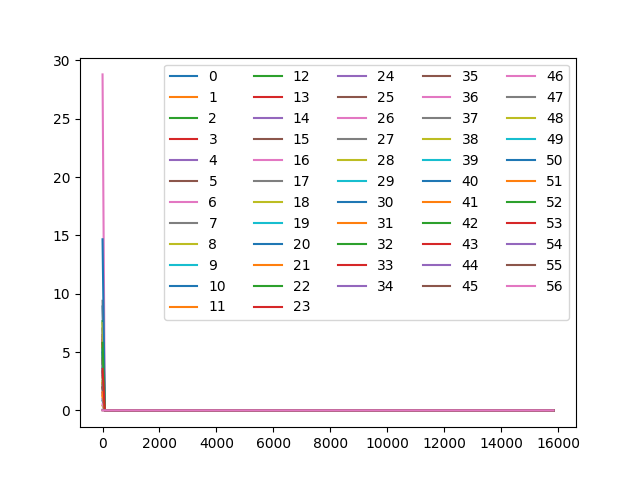

In [84]:
# plot the distribution of all features
nextplot()
densities = [scipy.stats.gaussian_kde(X[:, j]) for j in range(D)]
xs = np.linspace(0, np.max(X), 200)
for j in range(D):
    plt.plot(xs, densities[j](xs), label=j)
plt.legend(ncol=5)

In [85]:
# this plots is not really helpful; go now explore further
# YOUR CODE HERE

# First Observation
- there is a very high spike around [0, 1]

In [186]:
import pandas as pd

df = pd.DataFrame(X)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,47,48,49,50,51,52,53,54,55,56
0,0.21,0.28,0.5,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.0,0.0,0.132,0.0,0.372,0.180,0.048,5.114,101.0,1028.0
1,0.00,0.00,0.0,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.0,0.0,0.137,0.0,0.137,0.000,0.000,3.537,40.0,191.0
2,0.00,0.00,0.0,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.0,0.0,0.135,0.0,0.135,0.000,0.000,3.537,40.0,191.0
3,0.00,0.00,0.0,0.0,1.85,0.00,0.00,1.85,0.00,0.00,...,0.0,0.0,0.223,0.0,0.000,0.000,0.000,3.000,15.0,54.0
4,0.00,0.00,0.0,0.0,1.92,0.00,0.00,0.00,0.00,0.64,...,0.0,0.0,0.054,0.0,0.164,0.054,0.000,1.671,4.0,112.0


# Second Observation
- the last 3 features are absolute features representing direct measurements -> this can be derived from the fact that they are not in the range of 0 and 1
- the first 54 features are relative features since they represent ratios from 0 to 1.

Text(0.5, 1.0, 'All relative features')

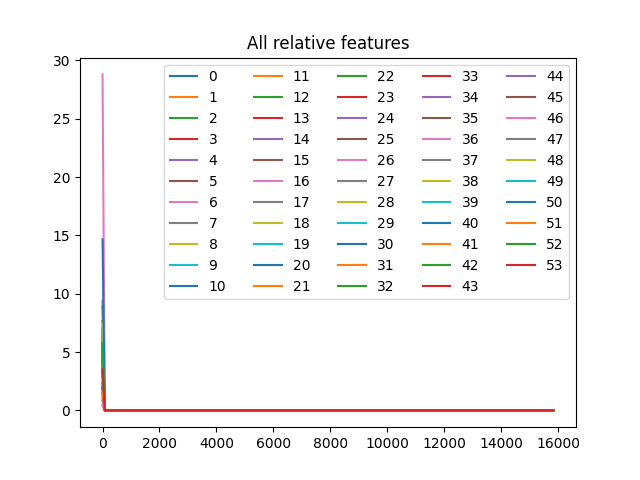

In [187]:
nextplot()
densities = [scipy.stats.gaussian_kde(X[:, j]) for j in range(D-3)]
xs = np.linspace(0, np.max(X), 200)
for j in range(D-3):
    plt.plot(xs, densities[j](xs), label=j)
plt.legend(ncol=5)
plt.title('All relative features')

Text(0.5, 1.0, 'Absolute features only')

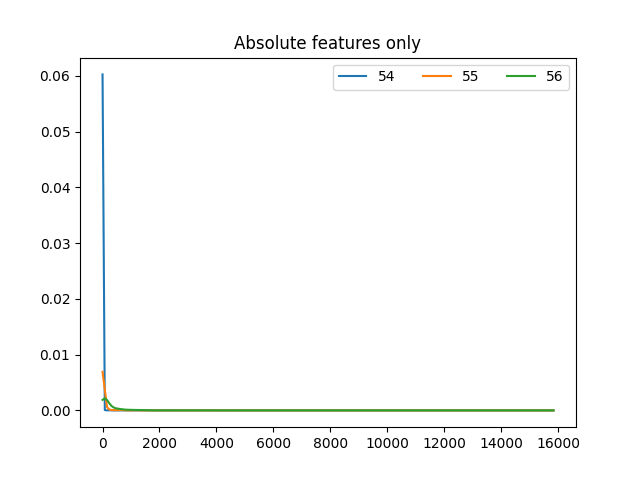

In [188]:
nextplot()
densities = [scipy.stats.gaussian_kde(X[:, j]) for j in range(D)]
xs = np.linspace(0, np.max(X), 200)
for j in range(D-3, D):
    plt.plot(xs, densities[j](xs), label=j)
plt.legend(ncol=5)
plt.title('Absolute features only')

Text(0.5, 1.0, 'All relative features truncated with x-axis truncated at 1')

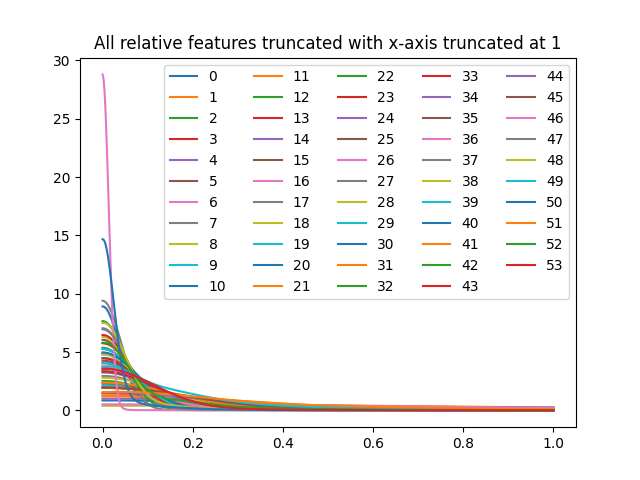

In [190]:
nextplot()
densities = [scipy.stats.gaussian_kde(X[:, j]) for j in range(D-3)]
xs = np.linspace(0, 1, 500) # changing the x axis scale: most of the density is between 0 and 0.4

for j in range(D-3):
    plt.plot(xs, densities[j](xs), label=j) # or features[j]
plt.legend(ncol=5)
plt.title('All relative features truncated with x-axis truncated at 1')

Text(0.5, 1.0, 'All relative features truncated with x-axis truncated at 0.5')

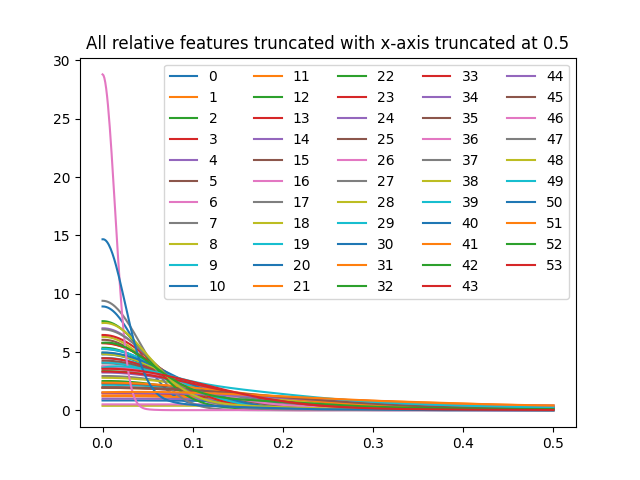

In [191]:
nextplot()
densities = [scipy.stats.gaussian_kde(X[:, j]) for j in range(D-3)]
xs = np.linspace(0, 0.5, 500) # changing the x axis scale: most of the density is between 0 and 0.4

for j in range(D-3):
    plt.plot(xs, densities[j](xs), label=j) # or features[j]
plt.legend(ncol=5)
plt.title('All relative features truncated with x-axis truncated at 0.5')

Text(0.5, 1.0, 'All relative features truncated with x-axis truncated at 0.1')

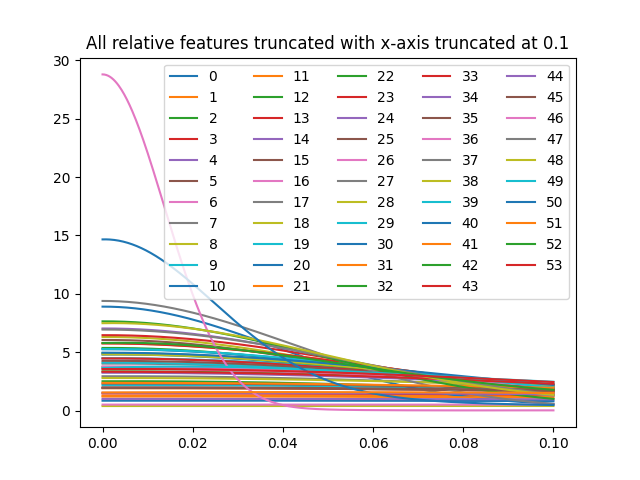

In [192]:
nextplot()
densities = [scipy.stats.gaussian_kde(X[:, j]) for j in range(D-3)]
xs = np.linspace(0, 0.1, 500) # changing the x axis scale: most of the density is between 0 and 0.4

for j in range(D-3):
    plt.plot(xs, densities[j](xs), label=j) # or features[j]
plt.legend(ncol=5)
plt.title('All relative features truncated with x-axis truncated at 0.1')

In [86]:
# Let's compute z-scores; create two new variables Xz and Xtestz.
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform both training and test data
Xz = scaler.fit_transform(X)
Xtestz = scaler.transform(Xtest)

# Check the resulting standardized datasets
print("Mean of each feature in Xz (should be ~0):", np.mean(Xz, axis=0))
print("Standard deviation of each feature in Xz (should be ~1):", np.std(Xz, axis=0))
print("Mean of each feature in Xtestz (should be ~0):", np.mean(Xtestz, axis=0))
print("Standard deviation of each feature in Xtestz (should be ~1):", np.std(Xtestz, axis=0))


Mean of each feature in Xz (should be ~0): [ 1.85459768e-17  9.27298839e-18 -5.56379304e-17 -9.27298839e-18
  5.56379304e-17  3.70919536e-17  0.00000000e+00 -7.41839072e-17
  5.56379304e-17  0.00000000e+00 -1.85459768e-17 -2.43415945e-17
 -4.63649420e-17  1.85459768e-17  1.85459768e-17  3.70919536e-17
 -3.70919536e-17 -9.27298839e-17 -1.66913791e-16  9.27298839e-18
  1.85459768e-17  9.27298839e-18 -5.56379304e-17 -1.85459768e-17
 -6.49109188e-17 -3.70919536e-17 -1.85459768e-17  1.85459768e-17
 -2.78189652e-17  4.63649420e-17 -1.85459768e-17  5.56379304e-17
  0.00000000e+00 -1.85459768e-17  3.70919536e-17  1.85459768e-17
 -9.27298839e-18  4.63649420e-18  1.85459768e-17  9.27298839e-18
  2.31824710e-17 -2.78189652e-17 -9.27298839e-18  4.63649420e-18
 -9.27298839e-18 -9.27298839e-18  1.39094826e-17 -2.78189652e-17
 -3.70919536e-17 -6.49109188e-17  4.63649420e-18  3.70919536e-17
 -3.70919536e-17  9.27298839e-18 -9.27298839e-18  9.27298839e-18
 -7.41839072e-17]
Standard deviation of each fe

In [87]:
# Let's check. Xz and Xtestz refer to the normalized datasets just created. We
# will use them throughout.
np.mean(Xz, axis=0)  # should be all 0
np.var(Xz, axis=0)  # should be all 1
np.mean(Xtestz, axis=0)  # what do you get here?
np.var(Xtestz, axis=0)

np.sum(Xz ** 3)  # should be: 1925261.15

np.float64(1925261.1560010156)

In [88]:
# Explore the normalized data
# YOUR CODE HERE
# Let's check. Xz and Xtestz refer to the normalized datasets just created. We
# will use them throughout.
print(np.mean(Xz, axis=0))  # should be all 0
print(np.var(Xz, axis=0)) # should be all 1
print(np.mean(Xtestz, axis=0))  # what do you get here?
print(np.var(Xtestz, axis=0))

print(np.sum(Xz ** 3))  # should be: 1925261.15

[ 1.85459768e-17  9.27298839e-18 -5.56379304e-17 -9.27298839e-18
  5.56379304e-17  3.70919536e-17  0.00000000e+00 -7.41839072e-17
  5.56379304e-17  0.00000000e+00 -1.85459768e-17 -2.43415945e-17
 -4.63649420e-17  1.85459768e-17  1.85459768e-17  3.70919536e-17
 -3.70919536e-17 -9.27298839e-17 -1.66913791e-16  9.27298839e-18
  1.85459768e-17  9.27298839e-18 -5.56379304e-17 -1.85459768e-17
 -6.49109188e-17 -3.70919536e-17 -1.85459768e-17  1.85459768e-17
 -2.78189652e-17  4.63649420e-17 -1.85459768e-17  5.56379304e-17
  0.00000000e+00 -1.85459768e-17  3.70919536e-17  1.85459768e-17
 -9.27298839e-18  4.63649420e-18  1.85459768e-17  9.27298839e-18
  2.31824710e-17 -2.78189652e-17 -9.27298839e-18  4.63649420e-18
 -9.27298839e-18 -9.27298839e-18  1.39094826e-17 -2.78189652e-17
 -3.70919536e-17 -6.49109188e-17  4.63649420e-18  3.70919536e-17
 -3.70919536e-17  9.27298839e-18 -9.27298839e-18  9.27298839e-18
 -7.41839072e-17]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.

Text(0.5, 1.0, 'normalised data')

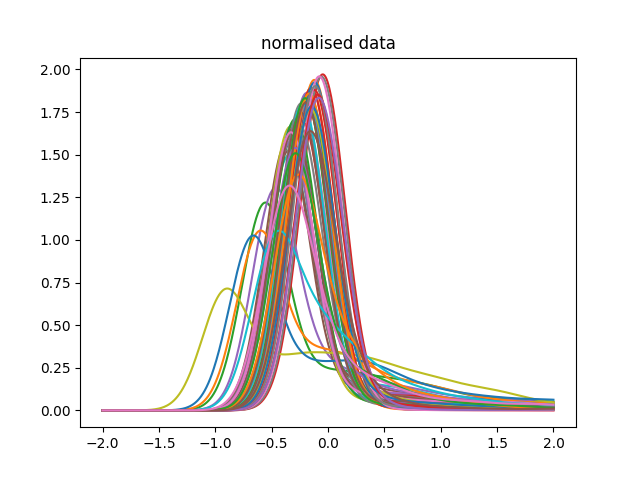

In [194]:
nextplot()
densities = [scipy.stats.gaussian_kde(Xz[:, j]) for j in range(D)]
xs = np.linspace(-2, 2, 500) # changing the x axis scale: most of the density is between 0 and 0.4
for j in range(D):
    plt.plot(xs, densities[j](xs)) # or features[j]
#plt.legend(ncol=5)
plt.title('normalised data')

Text(0.5, 1.0, 'normalised data on absolute features')

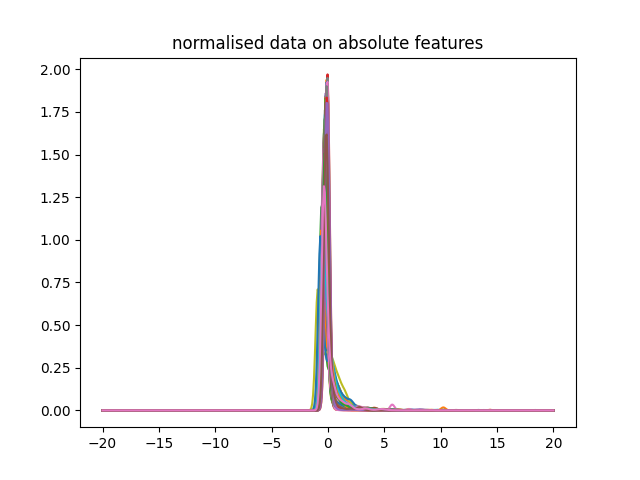

In [195]:
nextplot()
densities = [scipy.stats.gaussian_kde(Xz[:, j]) for j in range(D)]
xs = np.linspace(-20, 20, 500) 
for j in range(D):
    plt.plot(xs, densities[j](xs)) # or features[j]
#plt.legend(ncol=5)
plt.title('normalised data on absolute features')

# 2. Maximum Likelihood Estimation

## Helper functions

In [89]:
def logsumexp(x):
    """Computes log(sum(exp(x)).

    Uses offset trick to reduce risk of numeric over- or underflow. When x is a
    1D ndarray, computes logsumexp of its entries. When x is a 2D ndarray,
    computes logsumexp of each column.

    Keyword arguments:
    x : a 1D or 2D ndarray
    """
    offset = np.max(x, axis=0)
    return offset + np.log(np.sum(np.exp(x - offset), axis=0))

In [90]:
# Define the logistic function. Make sure it operates on both scalars
# and vectors.
def sigma(x):
    # For large positive x, np.exp(-x) approaches 0, so sigma(x) ~ 1.
    # For large negative x, np.exp(-x) becomes very large, so sigma(x) ~ 0.
    return np.where(x >= 0, 
                    1 / (1 + np.exp(-x)), 
                    np.exp(x) / (1 + np.exp(x)))


In [91]:
# this should give:
# [0.5, array([0.26894142, 0.5, 0.73105858])]
[sigma(0), sigma(np.array([-1, 0, 1]))]

[array(0.5), array([0.26894142, 0.5       , 0.73105858])]

Logistic function
$$
\log(\sigma(x)) = \log\left(\frac{1}{1 + e^{-x}}\right) = -\log(1 + e^{-x})
$$


In [92]:
# Define the logarithm of the logistic function. Make sure it operates on both
# scalars and vectors. Perhaps helpful: isinstance(x, np.ndarray).
def logsigma(x):
    # Compute the log of the logistic function in a numerically stable way
    return np.where(
        x >= 0,
        -np.log1p(np.exp(-x)),  # log(1 + exp(-x)) is stable for large positive x
        x - np.log1p(np.exp(x))  # x - log(1 + exp(x)) is stable for large negative x
    )


In [93]:
# this should give:
# [-0.69314718055994529, array([-1.31326169, -0.69314718, -0.31326169])]
[logsigma(0), logsigma(np.array([-1, 0, 1]))]

[array(-0.69314718), array([-1.31326169, -0.69314718, -0.31326169])]

## 2b Log-likelihood and gradient

$$
\text{log-likelihood} = \sum_{i=1}^{N} \left( y_i \cdot \log(\sigma(X_i \cdot w)) + (1 - y_i) \cdot \log(1 - \sigma(X_i \cdot w)) \right)
$$


In [94]:
def l(y, X, w):
    """Log-likelihood of the logistic regression model.

    Parameters
    ----------
    y : ndarray of shape (N,)
        Binary labels (either 0 or 1).
    X : ndarray of shape (N,D)
        Design matrix.
    w : ndarray of shape (D,)
        Weight vector.
    """
    # YOUR CODE HERE
    # Compute the linear combination X @ w once
    z = np.dot(X, w)
    
    # Use z and -z in logsigma, avoiding recomputation
    return np.sum(y * logsigma(z) + (1 - y) * logsigma(-z))


In [95]:
# this should give:
# -47066.641667825766
l(y, Xz, np.linspace(-5, 5, D))

np.float64(-47066.641667825774)

The gradient is calculated as
$$
\frac{\partial l}{\partial w} = X^T \cdot (y - \sigma(X \cdot w))
$$


In [96]:
def dl(y, X, w):
    """Gradient of the log-likelihood of the logistic regression model.

    Parameters
    ----------
    y : ndarray of shape (N,)
        Binary labels (either 0 or 1).
    X : ndarray of shape (N,D)
        Design matrix.
    w : ndarray of shape (D,)
        Weight vector.

    Returns
    -------
    ndarray of shape (D,)
    """
    # YOUR CODE HERE
    # Compute the predicted probabilities
    predictions = sigma(np.dot(X, w))
    
    # Calculate the gradient as X.T @ (y - predictions)
    return np.dot(X.T, (y - predictions))


In [97]:
# this should give:
# array([  551.33985842,   143.84116318,   841.83373606,   156.87237578,
#          802.61217579,   795.96202907,   920.69045803,   621.96516752,
#          659.18724769,   470.81259805,   771.32406968,   352.40325626,
#          455.66972482,   234.36600888,   562.45454038,   864.83981264,
#          787.19723703,   649.48042176,   902.6478154 ,   544.00539886,
#         1174.78638035,   120.3598967 ,   839.61141672,   633.30453444,
#         -706.66815087,  -630.2039816 ,  -569.3451386 ,  -527.50996698,
#         -359.53701083,  -476.64334832,  -411.60620464,  -375.11950586,
#         -345.37195689,  -376.22044258,  -407.31761977,  -456.23251936,
#         -596.86960184,  -107.97072355,  -394.82170044,  -229.18125598,
#         -288.46356547,  -362.13402385,  -450.87896465,  -277.03932676,
#         -414.99293368,  -452.28771693,  -167.54649092,  -270.9043748 ,
#         -252.20140951,  -357.72497343,  -259.12468742,   418.35938483,
#          604.54173228,    43.10390907,   152.24258478,   378.16731033,
#          416.12032881])
dl(y, Xz, np.linspace(-5, 5, D))

array([ 551.33985842,  143.84116318,  841.83373606,  156.87237578,
        802.61217579,  795.96202907,  920.69045803,  621.96516752,
        659.18724769,  470.81259805,  771.32406968,  352.40325626,
        455.66972482,  234.36600888,  562.45454038,  864.83981264,
        787.19723703,  649.48042176,  902.6478154 ,  544.00539886,
       1174.78638035,  120.3598967 ,  839.61141672,  633.30453444,
       -706.66815087, -630.2039816 , -569.3451386 , -527.50996698,
       -359.53701083, -476.64334832, -411.60620464, -375.11950586,
       -345.37195689, -376.22044258, -407.31761977, -456.23251936,
       -596.86960184, -107.97072355, -394.82170044, -229.18125598,
       -288.46356547, -362.13402385, -450.87896465, -277.03932676,
       -414.99293368, -452.28771693, -167.54649092, -270.9043748 ,
       -252.20140951, -357.72497343, -259.12468742,  418.35938483,
        604.54173228,   43.10390907,  152.24258478,  378.16731033,
        416.12032881])

## 2c Gradient descent

In [98]:
# you don't need to modify this function
def optimize(obj_up, theta0, nepochs=50, eps0=0.01, verbose=True):
    """Iteratively minimize a function.

    We use it here to run either gradient descent or stochastic gradient
    descent, using arbitrarly optimization criteria.

    Parameters
    ----------
    obj_up  : a tuple of form (f, update) containing two functions f and update.
              f(theta) computes the value of the objective function.
              update(theta,eps) performs an epoch of parameter update with step size
              eps and returns the result.
    theta0  : ndarray of shape (D,)
              Initial parameter vector.
    nepochs : int
              How many epochs (calls to update) to run.
    eps0    : float
              Initial step size.
    verbose : boolean
              Whether to print progress information.

    Returns
    -------
    A triple consisting of the fitted parameter vector, the values of the
    objective function after every epoch, and the step sizes that were used.
    """

    f, update = obj_up

    # initialize results
    theta = theta0
    values = np.zeros(nepochs + 1)
    eps = np.zeros(nepochs + 1)
    values[0] = f(theta0)
    eps[0] = eps0

    # now run the update function nepochs times
    for epoch in range(nepochs):
        if verbose:
            print(
                "Epoch {:3d}: f={:10.3f}, eps={:10.9f}".format(
                    epoch, values[epoch], eps[epoch]
                )
            )
        theta = update(theta, eps[epoch])

        # we use the bold driver heuristic
        values[epoch + 1] = f(theta)
        if values[epoch] < values[epoch + 1]:
            eps[epoch + 1] = eps[epoch] / 2.0
        else:
            eps[epoch + 1] = eps[epoch] * 1.05

    # all done
    if verbose:
        print("Result after {} epochs: f={}".format(nepochs, values[-1]))
    return theta, values, eps

In [99]:
# define the objective and update function for one gradient-descent epoch for
# fitting an MLE estimate of logistic regression with gradient descent (should
# return a tuple of two functions; see optimize)
def gd(y, X):
    """Defines the objective and update functions for one gradient descent epoch 
    to fit an MLE estimate of logistic regression.

    Parameters
    ----------
    y : ndarray of shape (N,)
        Binary labels (either 0 or 1).
    X : ndarray of shape (N, D)
        Design matrix.

    Returns
    -------
    tuple
        A tuple containing:
        - objective: Function that computes the negative log-likelihood.
        - update: Function that updates weights with a single gradient descent step.
    """
    
    def objective(w):
        """Objective function: Negative log-likelihood of logistic regression."""
        return -l(y, X, w)

    def update(w, eps):
        """Update function: Performs a gradient descent step."""
        return w + eps * dl(y, X, w) 

    return (objective, update)


In [100]:
# this should give
# [47066.641667825766,
#  array([  4.13777838e+01,  -1.56745627e+01,   5.75882538e+01,
#           1.14225143e+01,   5.54249703e+01,   5.99229049e+01,
#           7.11220141e+01,   4.84761728e+01,   5.78067289e+01,
#           4.54794720e+01,   7.14638492e+01,   1.51369386e+01,
#           3.36375739e+01,   2.15061217e+01,   5.78014255e+01,
#           6.72743066e+01,   7.00829312e+01,   5.29328088e+01,
#           6.16042473e+01,   5.50018510e+01,   8.94624817e+01,
#           2.74784480e+01,   8.51763599e+01,   5.60363965e+01,
#          -2.55865589e+01,  -1.53788213e+01,  -4.67015412e+01,
#          -2.50356570e+00,  -3.85357592e+00,  -2.21819155e+00,
#           3.32098671e+00,   3.86933390e+00,  -2.00309898e+01,
#           3.84684492e+00,  -2.19847927e-01,  -1.29775457e+00,
#          -1.28374302e+01,  -2.78303173e+00,  -5.61671182e+00,
#           1.73657121e+01,  -6.81197570e+00,  -1.20249002e+01,
#           2.65789491e+00,  -1.39557852e+01,  -2.01135653e+01,
#          -2.72134051e+01,  -9.45952961e-01,  -1.02239111e+01,
#           1.52794293e-04,  -5.18938123e-01,  -3.19717561e+00,
#           4.62953437e+01,   7.87893022e+01,   1.88618651e+01,
#           2.85195027e+01,   5.04698358e+01,   6.41240689e+01])
f, update = gd(y, Xz)
[f(np.linspace(-5, 5, D)), update(np.linspace(-5, -5, D), 0.1)]

[np.float64(47066.641667825774),
 array([ 4.13777838e+01, -1.56745627e+01,  5.75882538e+01,  1.14225143e+01,
         5.54249703e+01,  5.99229049e+01,  7.11220141e+01,  4.84761728e+01,
         5.78067289e+01,  4.54794720e+01,  7.14638492e+01,  1.51369386e+01,
         3.36375739e+01,  2.15061217e+01,  5.78014255e+01,  6.72743066e+01,
         7.00829312e+01,  5.29328088e+01,  6.16042473e+01,  5.50018510e+01,
         8.94624817e+01,  2.74784480e+01,  8.51763599e+01,  5.60363965e+01,
        -2.55865589e+01, -1.53788213e+01, -4.67015412e+01, -2.50356570e+00,
        -3.85357592e+00, -2.21819155e+00,  3.32098671e+00,  3.86933390e+00,
        -2.00309898e+01,  3.84684492e+00, -2.19847927e-01, -1.29775457e+00,
        -1.28374302e+01, -2.78303173e+00, -5.61671182e+00,  1.73657121e+01,
        -6.81197570e+00, -1.20249002e+01,  2.65789491e+00, -1.39557852e+01,
        -2.01135653e+01, -2.72134051e+01, -9.45952961e-01, -1.02239111e+01,
         1.52794293e-04, -5.18938123e-01, -3.19717561e+

In [101]:
# you can run gradient descent!
numpy.random.seed(0)
w0 = np.random.normal(size=D)
wz_gd, vz_gd, ez_gd = optimize(gd(y, Xz), w0, nepochs=500)

Epoch   0: f=  6636.208, eps=0.010000000
Epoch   1: f=  4216.957, eps=0.010500000
Epoch   2: f=  2657.519, eps=0.011025000
Epoch   3: f=  1926.135, eps=0.011576250
Epoch   4: f=  1449.495, eps=0.012155063
Epoch   5: f=  1207.529, eps=0.012762816
Epoch   6: f=  1052.489, eps=0.013400956
Epoch   7: f=   957.275, eps=0.014071004
Epoch   8: f=   899.610, eps=0.014774554
Epoch   9: f=   882.904, eps=0.015513282
Epoch  10: f=  1017.083, eps=0.007756641
Epoch  11: f=   840.760, eps=0.008144473
Epoch  12: f=   805.649, eps=0.008551697
Epoch  13: f=   822.108, eps=0.004275848
Epoch  14: f=   746.377, eps=0.004489641
Epoch  15: f=   735.803, eps=0.004714123
Epoch  16: f=   729.780, eps=0.004949829
Epoch  17: f=   724.467, eps=0.005197320
Epoch  18: f=   719.408, eps=0.005457186
Epoch  19: f=   714.564, eps=0.005730046
Epoch  20: f=   709.932, eps=0.006016548
Epoch  21: f=   705.514, eps=0.006317375
Epoch  22: f=   701.321, eps=0.006633244
Epoch  23: f=   697.373, eps=0.006964906
Epoch  24: f=   

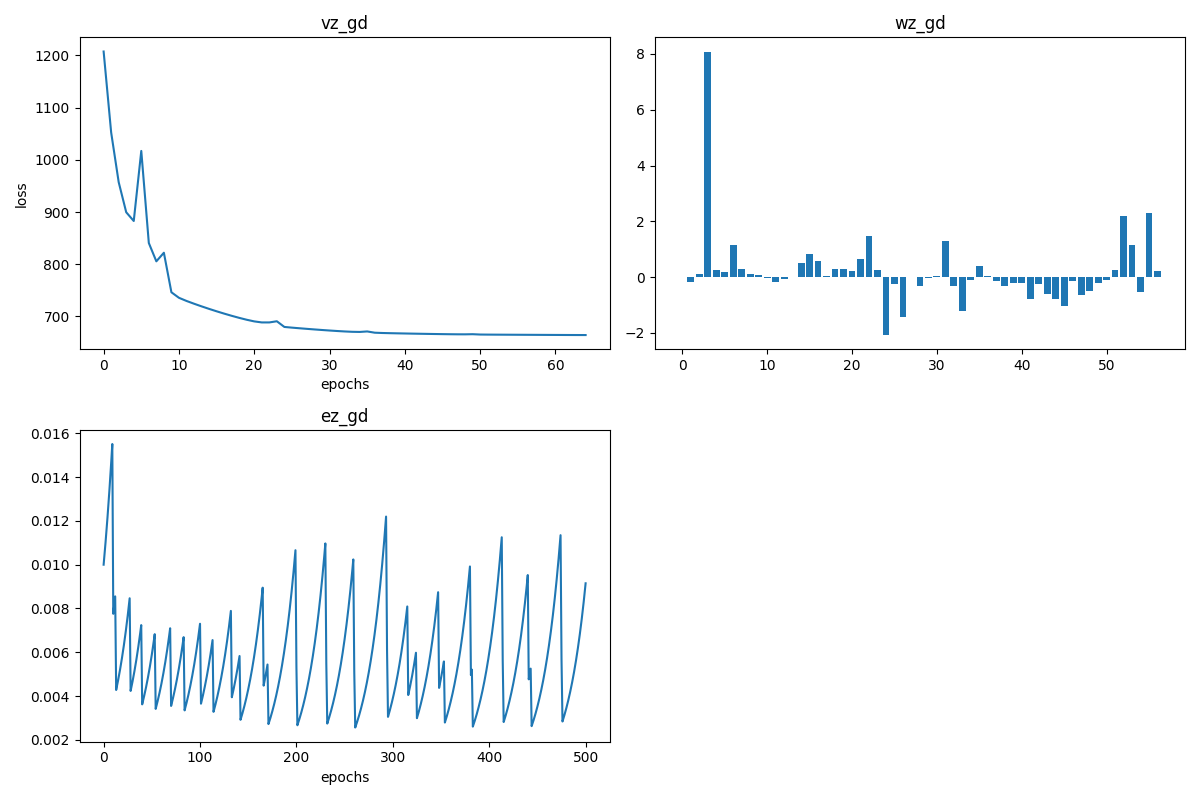

In [102]:
# Visualize the progress of gradient descent for vz_gd, wz_gd, and ez_gd

fig, axes = plt.subplots(2, 2, figsize=(12, 8))  # Create a 2x2 grid for subplots

# Plot vz_gd progress
axes[0, 0].plot(vz_gd[5:70])
axes[0, 0].set_xlabel('epochs')
axes[0, 0].set_ylabel('loss')
axes[0, 0].set_title('vz_gd')

# Plot wz_gd as a bar chart
axes[0, 1].bar(range(len(wz_gd)), wz_gd)
axes[0, 1].set_title('wz_gd')

# Plot ez_gd convergence
axes[1, 0].plot(ez_gd)
axes[1, 0].set_xlabel('epochs')
axes[1, 0].set_title('ez_gd')

# Hide the unused subplot (bottom-right)
axes[1, 1].axis('off')

plt.tight_layout()  # Adjust spacing between plots
plt.show()


## 2d Stochastic gradient descent

In [103]:
def sgdepoch(y, X, w, eps):
    """Run one SGD epoch and return the updated weight vector. """
    # Run N stochastic gradient steps (without replacement). Do not rescale each
    # step by factor N (i.e., proceed differently than in the lecture slides).
    # YOUR CODE HERE
    # Shuffle indices for stochastic updates
    for i in np.random.permutation(len(X)):
        # Store the feature vector of the i-th sample
        xi = X[i]
        # Update weights with the stochastic gradient
        w = w + eps * (y[i] - sigma(np.dot(w, xi))) * xi
    return w


In [104]:
# when you run this multiple times, with 50% probability you should get the
# following result (there is one other result which is very close):
# array([ -3.43689655e+02,  -1.71161311e+02,  -5.71093536e+02,
#         -5.16478220e+01,   4.66294348e+02,  -3.71589878e+02,
#          5.21493183e+02,   1.25699230e+03,   8.33804130e+02,
#          5.63185399e+02,   1.32761302e+03,  -2.64104011e+02,
#          7.10693307e+02,  -1.75497331e+02,  -1.94174427e+02,
#          1.11641507e+02,  -3.30817509e+02,  -3.46754913e+02,
#          8.48722111e+02,  -1.89136304e+02,  -4.25693844e+02,
#         -1.23084189e+02,  -2.95894797e+02,  -2.35789333e+02,
#         -3.38695243e+02,  -3.05642830e+02,  -2.28975383e+02,
#         -2.38075137e+02,  -1.66702530e+02,  -2.27341599e+02,
#         -1.77575620e+02,  -1.49093855e+02,  -1.70028859e+02,
#         -1.50243833e+02,  -1.82986008e+02,  -2.41143708e+02,
#         -3.31047159e+02,  -5.79991185e+01,  -1.98477863e+02,
#         -1.91264948e+02,  -1.17371919e+02,  -1.66953779e+02,
#         -2.01472565e+02,  -1.23330949e+02,  -3.00857740e+02,
#         -1.95853348e+02,  -7.44868073e+01,  -1.11172370e+02,
#         -1.57618226e+02,  -1.25729512e+00,  -1.45536466e+02,
#         -1.43362438e+02,  -3.00429708e+02,  -9.84391082e+01,
#         -4.54152047e+01,  -5.26492232e+01,  -1.45175427e+02])
sgdepoch(y[1:3], Xz[1:3, :], np.linspace(-5, 5, D), 1000)

/var/folders/mm/5jv3lmt93yd4f1nkxw3yxcv80000gp/T/ipykernel_76949/4243986844.py:8: RuntimeWarning: overflow encountered in exp
  np.exp(x) / (1 + np.exp(x)))
/var/folders/mm/5jv3lmt93yd4f1nkxw3yxcv80000gp/T/ipykernel_76949/4243986844.py:8: RuntimeWarning: invalid value encountered in scalar divide
  np.exp(x) / (1 + np.exp(x)))


array([-3.43689655e+02, -1.71161311e+02, -5.71093536e+02, -5.16478220e+01,
        4.66294348e+02, -3.71589878e+02,  5.21493183e+02,  1.25699230e+03,
        8.33804130e+02,  5.63185399e+02,  1.32761302e+03, -2.64104011e+02,
        7.10693307e+02, -1.75497331e+02, -1.94174427e+02,  1.11641507e+02,
       -3.30817509e+02, -3.46754913e+02,  8.48722111e+02, -1.89136304e+02,
       -4.25693844e+02, -1.23084189e+02, -2.95894797e+02, -2.35789333e+02,
       -3.38695243e+02, -3.05642830e+02, -2.28975383e+02, -2.38075137e+02,
       -1.66702530e+02, -2.27341599e+02, -1.77575620e+02, -1.49093855e+02,
       -1.70028859e+02, -1.50243833e+02, -1.82986008e+02, -2.41143708e+02,
       -3.31047159e+02, -5.79991185e+01, -1.98477863e+02, -1.91264948e+02,
       -1.17371919e+02, -1.66953779e+02, -2.01472565e+02, -1.23330949e+02,
       -3.00857740e+02, -1.95853348e+02, -7.44868073e+01, -1.11172370e+02,
       -1.57618226e+02, -1.25729512e+00, -1.45536466e+02, -1.43362438e+02,
       -3.00429708e+02, -

In [105]:
# define the objective and update function for one gradient-descent epoch for
# fitting an MLE estimate of logistic regression with stochastic gradient descent
# (should return a tuple of two functions; see optimize)
def sgd(y, X):
    def objective(w):
        # YOUR CODE HERE
        """Objective function: Negative log-likelihood of logistic regression."""
        return -l(y, X, w)

    def update(w, eps):
        return sgdepoch(y, X, w, eps)

    return (objective, update)

In [106]:
# with 50% probability, you should get:
# [40.864973045695081,
#  array([ -3.43689655e+02,  -1.71161311e+02,  -5.71093536e+02,
#          -5.16478220e+01,   4.66294348e+02,  -3.71589878e+02,
#           5.21493183e+02,   1.25699230e+03,   8.33804130e+02,
#           5.63185399e+02,   1.32761302e+03,  -2.64104011e+02,
#           7.10693307e+02,  -1.75497331e+02,  -1.94174427e+02,
#           1.11641507e+02,  -3.30817509e+02,  -3.46754913e+02,
#           8.48722111e+02,  -1.89136304e+02,  -4.25693844e+02,
#          -1.23084189e+02,  -2.95894797e+02,  -2.35789333e+02,
#          -3.38695243e+02,  -3.05642830e+02,  -2.28975383e+02,
#          -2.38075137e+02,  -1.66702530e+02,  -2.27341599e+02,
#          -1.77575620e+02,  -1.49093855e+02,  -1.70028859e+02,
#          -1.50243833e+02,  -1.82986008e+02,  -2.41143708e+02,
#          -3.31047159e+02,  -5.79991185e+01,  -1.98477863e+02,
#          -1.91264948e+02,  -1.17371919e+02,  -1.66953779e+02,
#          -2.01472565e+02,  -1.23330949e+02,  -3.00857740e+02,
#          -1.95853348e+02,  -7.44868073e+01,  -1.11172370e+02,
#          -1.57618226e+02,  -1.25729512e+00,  -1.45536466e+02,
#          -1.43362438e+02,  -3.00429708e+02,  -9.84391082e+01,
#          -4.54152047e+01,  -5.26492232e+01,  -1.45175427e+02])]
f, update = sgd(y[1:3], Xz[1:3, :])
[f(np.linspace(-5, 5, D)), update(np.linspace(-5, 5, D), 1000)]

/var/folders/mm/5jv3lmt93yd4f1nkxw3yxcv80000gp/T/ipykernel_76949/4243986844.py:8: RuntimeWarning: overflow encountered in exp
  np.exp(x) / (1 + np.exp(x)))
/var/folders/mm/5jv3lmt93yd4f1nkxw3yxcv80000gp/T/ipykernel_76949/4243986844.py:8: RuntimeWarning: invalid value encountered in scalar divide
  np.exp(x) / (1 + np.exp(x)))


[np.float64(40.86497304569508),
 array([-3.43689655e+02, -1.71161311e+02, -5.71093536e+02, -5.16478220e+01,
         4.66294348e+02, -3.71589878e+02,  5.21493183e+02,  1.25699230e+03,
         8.33804130e+02,  5.63185399e+02,  1.32761302e+03, -2.64104011e+02,
         7.10693307e+02, -1.75497331e+02, -1.94174427e+02,  1.11641507e+02,
        -3.30817509e+02, -3.46754913e+02,  8.48722111e+02, -1.89136304e+02,
        -4.25693844e+02, -1.23084189e+02, -2.95894797e+02, -2.35789333e+02,
        -3.38695243e+02, -3.05642830e+02, -2.28975383e+02, -2.38075137e+02,
        -1.66702530e+02, -2.27341599e+02, -1.77575620e+02, -1.49093855e+02,
        -1.70028859e+02, -1.50243833e+02, -1.82986008e+02, -2.41143708e+02,
        -3.31047159e+02, -5.79991185e+01, -1.98477863e+02, -1.91264948e+02,
        -1.17371919e+02, -1.66953779e+02, -2.01472565e+02, -1.23330949e+02,
        -3.00857740e+02, -1.95853348e+02, -7.44868073e+01, -1.11172370e+02,
        -1.57618226e+02, -1.25729512e+00, -1.45536466e+0

In [107]:
# you can run stochastic gradient descent!
wz_sgd, vz_sgd, ez_sgd = optimize(sgd(y, Xz), w0, nepochs=500)

Epoch   0: f=  6636.208, eps=0.010000000
Epoch   1: f=   958.654, eps=0.010500000
Epoch   2: f=   786.651, eps=0.011025000
Epoch   3: f=   738.739, eps=0.011576250
Epoch   4: f=   718.166, eps=0.012155063
Epoch   5: f=   709.413, eps=0.012762816
Epoch   6: f=   696.048, eps=0.013400956
Epoch   7: f=   701.674, eps=0.006700478
Epoch   8: f=   686.406, eps=0.007035502
Epoch   9: f=   683.692, eps=0.007387277
Epoch  10: f=   684.500, eps=0.003693639
Epoch  11: f=   679.969, eps=0.003878321
Epoch  12: f=   679.230, eps=0.004072237
Epoch  13: f=   678.181, eps=0.004275848
Epoch  14: f=   677.570, eps=0.004489641
Epoch  15: f=   676.763, eps=0.004714123
Epoch  16: f=   675.966, eps=0.004949829
Epoch  17: f=   676.625, eps=0.002474914
Epoch  18: f=   675.185, eps=0.002598660
Epoch  19: f=   674.531, eps=0.002728593
Epoch  20: f=   674.095, eps=0.002865023
Epoch  21: f=   673.692, eps=0.003008274
Epoch  22: f=   673.359, eps=0.003158688
Epoch  23: f=   673.075, eps=0.003316622
Epoch  24: f=   

## 2e Compare GD and SGD

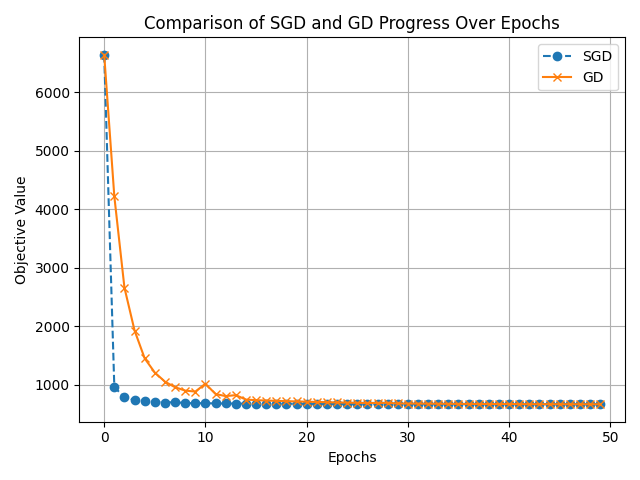

In [108]:
# YOUR CODE HERE
nextplot()
plt.plot(vz_sgd[0:50], label='SGD', linestyle='--', marker='o')
plt.plot(vz_gd[0:50], label='GD', linestyle='-', marker='x')
plt.xlabel('Epochs')
plt.ylabel('Objective Value')
plt.title('Comparison of SGD and GD Progress Over Epochs')
plt.legend()
plt.grid(True)  # Optional: Adds a grid for better readability
plt.tight_layout()
plt.show()


# 3 Prediction

In [109]:
def predict(Xtest, w):
    """Compute predicted confidence values for logistic regression.
    
    Parameters
    ----------
    Xtest : ndarray of shape (Ntest, D)
        Test data.
    w : ndarray of shape (D,)
        Weight vector for logistic regression.

    Returns
    -------
    ndarray of shape (Ntest,)
        Vector of predicted confidence values (probabilities).
    """
    return sigma(np.dot(Xtest, w))


def classify(Xtest, w):
    """Compute predicted class labels (0 or 1) for logistic regression.
    
    Parameters
    ----------
    Xtest : ndarray of shape (Ntest, D)
        Test data.
    w : ndarray of shape (D,)
        Weight vector for logistic regression.

    Returns
    -------
    ndarray of shape (Ntest,)
        Vector of predicted class labels (0 or 1).
    """
    return np.where(predict(Xtest, w) >= 0.5, 1, 0)


In [110]:
# Example: confusion matrix
yhat = predict(Xtestz, wz_gd)
ypred = classify(Xtestz, wz_gd)
print(sklearn.metrics.confusion_matrix(ytest, ypred))  # true x predicted

[[887  54]
 [ 71 524]]


In [111]:
# Example: classification report
print(sklearn.metrics.classification_report(ytest, ypred))

              precision    recall  f1-score   support

           0       0.93      0.94      0.93       941
           1       0.91      0.88      0.89       595

    accuracy                           0.92      1536
   macro avg       0.92      0.91      0.91      1536
weighted avg       0.92      0.92      0.92      1536



/var/folders/mm/5jv3lmt93yd4f1nkxw3yxcv80000gp/T/ipykernel_76949/3775863524.py:19: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure()  # this creates a new plot


Text(0, 0.5, 'Precision')

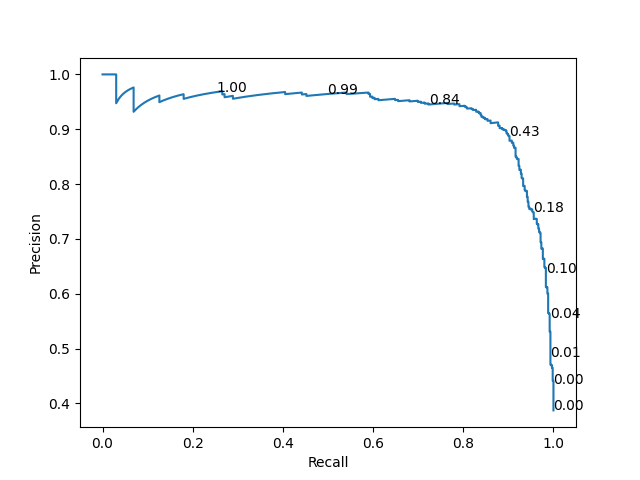

In [112]:
# Example: precision-recall curve (with annotated thresholds)
nextplot()
precision, recall, thresholds = sklearn.metrics.precision_recall_curve(ytest, yhat)
plt.plot(recall, precision)
for x in np.linspace(0, 1, 10, endpoint=False):
    index = int(x * (precision.size - 1))
    plt.text(recall[index], precision[index], "{:3.2f}".format(thresholds[index]))
plt.xlabel("Recall")
plt.ylabel("Precision")

In [113]:
# Explore which features are considered important
# both the gradient descent (wz_gd) and stochastic gradient descent (wz_sgd) models
# YOUR CODE HERE
for feature, weight_gd, weight_sgd in zip(features, wz_gd, wz_sgd):
    print(f"{feature}: GD odds ratio = {np.exp(weight_gd):.3f}, SGD odds ratio = {np.exp(weight_sgd):.3f}")


word_freq_make: GD odds ratio = 0.991, SGD odds ratio = 0.992
word_freq_address: GD odds ratio = 0.829, SGD odds ratio = 0.833
word_freq_all: GD odds ratio = 1.129, SGD odds ratio = 1.130
word_freq_3d: GD odds ratio = 3249.503, SGD odds ratio = 52.309
word_freq_our: GD odds ratio = 1.296, SGD odds ratio = 1.295
word_freq_over: GD odds ratio = 1.198, SGD odds ratio = 1.197
word_freq_remove: GD odds ratio = 3.169, SGD odds ratio = 3.292
word_freq_internet: GD odds ratio = 1.337, SGD odds ratio = 1.338
word_freq_order: GD odds ratio = 1.120, SGD odds ratio = 1.118
word_freq_mail: GD odds ratio = 1.068, SGD odds ratio = 1.064
word_freq_receive: GD odds ratio = 0.954, SGD odds ratio = 0.953
word_freq_will: GD odds ratio = 0.847, SGD odds ratio = 0.850
word_freq_people: GD odds ratio = 0.937, SGD odds ratio = 0.937
word_freq_report: GD odds ratio = 0.989, SGD odds ratio = 0.988
word_freq_addresses: GD odds ratio = 1.639, SGD odds ratio = 1.696
word_freq_free: GD odds ratio = 2.325, SGD odds 

In [196]:
# YOUR CODE HERE
gd_interpretable = {}
sgd_interpretable = {}
for i in (np.argsort(wz_gd)):
    gd_interpretable[features[i]] = np.exp(wz_gd[i])
    sgd_interpretable[features[i]] = np.exp(wz_sgd[i])

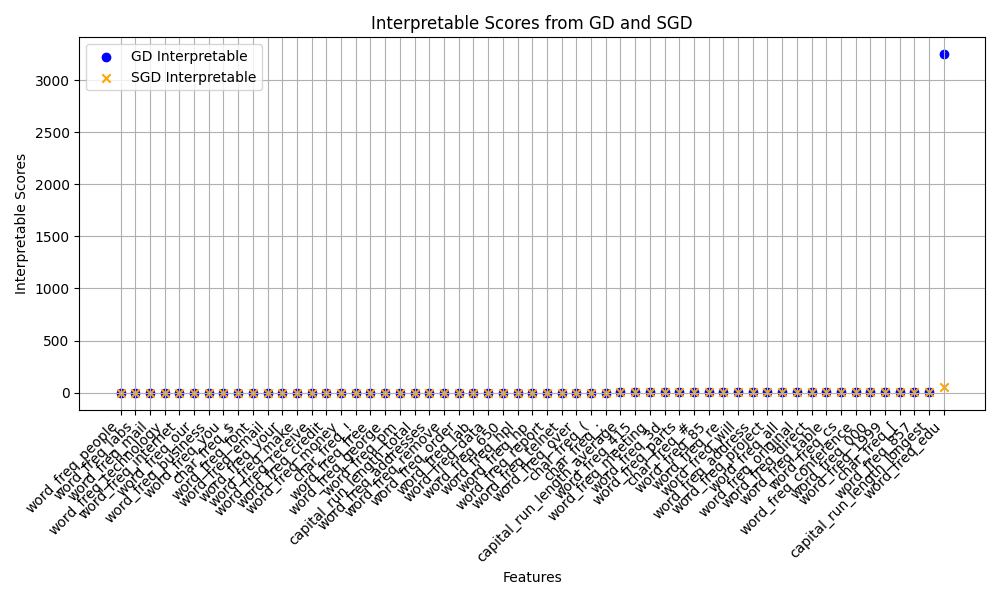

In [197]:
# Assuming gd_interpretable and sgd_interpretable are already populated
features = list(gd_interpretable.keys())

# Extracting values for plotting
gd_values = [gd_interpretable[feature] for feature in features]
sgd_values = [sgd_interpretable[feature] for feature in features]

# Setting up the scatter plot
plt.figure(figsize=(10, 6))

# Scatter plot for GD values
plt.scatter(features, gd_values, color='blue', label='GD Interpretable', marker='o')
# Scatter plot for SGD values
plt.scatter(features, sgd_values, color='orange', label='SGD Interpretable', marker='x')

# Adding labels and title
plt.xlabel('Features')
plt.ylabel('Interpretable Scores')
plt.title('Interpretable Scores from GD and SGD')
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.grid(True)

# Show the plot
plt.tight_layout()
plt.show()

# 4 Maximum Aposteriori Estimation

## 4a Gradient Descent

In [114]:
def l_l2(y, X, w, lambda_):
    # YOUR CODE HERE
    """Log-density of posterior of logistic regression with weights w and L2
    regularization parameter lambda_.

    Parameters
    ----------
    y : ndarray of shape (N,)
        Binary labels (either 0 or 1).
    X : ndarray of shape (N, D)
        Design matrix.
    w : ndarray of shape (D,)
        Weight vector.
    lambda_ : float
        L2 regularization parameter.

    Returns
    -------
    float
        Log-density of the posterior with L2 regularization.
    """
    return l(y, X, w) - (lambda_ / 2) * (np.linalg.norm(w) ** 2)


In [115]:
# this should give:
# [-47066.641667825766, -47312.623810682911]
[l_l2(y, Xz, np.linspace(-5, 5, D), 0), l_l2(y, Xz, np.linspace(-5, 5, D), 1)]

[np.float64(-47066.641667825774), np.float64(-47312.62381068292)]

In [116]:
def dl_l2(y, X, w, lambda_):
    # YOUR CODE HERE
    """Gradient of the log-density of the posterior of logistic regression with 
    L2 regularization.

    Parameters
    ----------
    y : ndarray of shape (N,)
        Binary labels (either 0 or 1).
    X : ndarray of shape (N, D)
        Design matrix.
    w : ndarray of shape (D,)
        Weight vector.
    lambda_ : float
        L2 regularization parameter.

    Returns
    -------
    ndarray of shape (D,)
        The gradient of the log-density of the posterior with L2 regularization.
    """
    # Compute the gradient with the L2 regularization term
    return dl(y, X, w) - lambda_ * w


In [117]:
# this should give:
# [array([  551.33985842,   143.84116318,   841.83373606,   156.87237578,
#           802.61217579,   795.96202907,   920.69045803,   621.96516752,
#           659.18724769,   470.81259805,   771.32406968,   352.40325626,
#           455.66972482,   234.36600888,   562.45454038,   864.83981264,
#           787.19723703,   649.48042176,   902.6478154 ,   544.00539886,
#          1174.78638035,   120.3598967 ,   839.61141672,   633.30453444,
#          -706.66815087,  -630.2039816 ,  -569.3451386 ,  -527.50996698,
#          -359.53701083,  -476.64334832,  -411.60620464,  -375.11950586,
#          -345.37195689,  -376.22044258,  -407.31761977,  -456.23251936,
#          -596.86960184,  -107.97072355,  -394.82170044,  -229.18125598,
#          -288.46356547,  -362.13402385,  -450.87896465,  -277.03932676,
#          -414.99293368,  -452.28771693,  -167.54649092,  -270.9043748 ,
#          -252.20140951,  -357.72497343,  -259.12468742,   418.35938483,
#           604.54173228,    43.10390907,   152.24258478,   378.16731033,
#           416.12032881]),
#  array([  556.33985842,   148.66259175,   846.4765932 ,   161.33666149,
#           806.89789007,   800.06917193,   924.61902946,   625.71516752,
#           662.75867626,   474.20545519,   774.5383554 ,   355.43897054,
#           458.52686767,   237.04458031,   564.95454038,   867.16124121,
#           789.34009417,   651.44470748,   904.43352968,   545.61254171,
#          1176.21495178,   121.6098967 ,   840.68284529,   634.19739158,
#          -705.95386516,  -629.66826731,  -568.98799574,  -527.33139555,
#          -359.53701083,  -476.82191975,  -411.9633475 ,  -375.65522015,
#          -346.08624261,  -377.11329972,  -408.38904835,  -457.48251936,
#          -598.29817327,  -109.57786641,  -396.60741472,  -231.14554169,
#          -290.60642261,  -364.45545242,  -453.37896465,  -279.71789819,
#          -417.85007654,  -455.32343122,  -170.76077664,  -274.29723194,
#          -255.77283808,  -361.47497343,  -263.05325885,   414.25224198,
#           600.25601799,    38.63962335,   147.59972763,   373.34588176,
#           411.12032881])]
[dl_l2(y, Xz, np.linspace(-5, 5, D), 0), dl_l2(y, Xz, np.linspace(-5, 5, D), 1)]

[array([ 551.33985842,  143.84116318,  841.83373606,  156.87237578,
         802.61217579,  795.96202907,  920.69045803,  621.96516752,
         659.18724769,  470.81259805,  771.32406968,  352.40325626,
         455.66972482,  234.36600888,  562.45454038,  864.83981264,
         787.19723703,  649.48042176,  902.6478154 ,  544.00539886,
        1174.78638035,  120.3598967 ,  839.61141672,  633.30453444,
        -706.66815087, -630.2039816 , -569.3451386 , -527.50996698,
        -359.53701083, -476.64334832, -411.60620464, -375.11950586,
        -345.37195689, -376.22044258, -407.31761977, -456.23251936,
        -596.86960184, -107.97072355, -394.82170044, -229.18125598,
        -288.46356547, -362.13402385, -450.87896465, -277.03932676,
        -414.99293368, -452.28771693, -167.54649092, -270.9043748 ,
        -252.20140951, -357.72497343, -259.12468742,  418.35938483,
         604.54173228,   43.10390907,  152.24258478,  378.16731033,
         416.12032881]),
 array([ 556.33985842, 

In [118]:
# now define the (f,update) tuple for optimize for logistic regression, L2
# regularization, and gradient descent
def gd_l2(y, X, lambda_):
    # YOUR CODE HERE
    def objective(w):
        """Objective function: Negative log-density of the posterior with L2 regularization."""
        return -l_l2(y, X, w, lambda_)

    def update(w, eps):
        """Update function: Performs a gradient descent step with L2 regularization."""
        return w + eps * dl_l2(y, X, w, lambda_)
    return (objective, update)


In [119]:
# let's run!
lambda_ = 100
wz_gd_l2, vz_gd_l2, ez_gd_l2 = optimize(gd_l2(y, Xz, lambda_), w0, nepochs=500)

Epoch   0: f=  9992.358, eps=0.010000000
Epoch   1: f= 23977.384, eps=0.005000000
Epoch   2: f=  5534.851, eps=0.005250000
Epoch   3: f=  1427.453, eps=0.005512500
Epoch   4: f=  1131.716, eps=0.005788125
Epoch   5: f=  1540.933, eps=0.002894063
Epoch   6: f=  1323.168, eps=0.003038766
Epoch   7: f=  1049.068, eps=0.003190704
Epoch   8: f=  1067.960, eps=0.001595352
Epoch   9: f=   989.861, eps=0.001675120
Epoch  10: f=   988.742, eps=0.001758876
Epoch  11: f=   988.585, eps=0.001846819
Epoch  12: f=   988.539, eps=0.001939160
Epoch  13: f=   988.522, eps=0.002036118
Epoch  14: f=   988.516, eps=0.002137924
Epoch  15: f=   988.513, eps=0.002244820
Epoch  16: f=   988.512, eps=0.002357061
Epoch  17: f=   988.512, eps=0.002474914
Epoch  18: f=   988.512, eps=0.002598660
Epoch  19: f=   988.512, eps=0.002728593
Epoch  20: f=   988.512, eps=0.002865023
Epoch  21: f=   988.512, eps=0.003008274
Epoch  22: f=   988.512, eps=0.003158688
Epoch  23: f=   988.512, eps=0.003316622
Epoch  24: f=   

## 4b Effect of Prior

In [120]:
# YOUR CODE HERE
# Define a range of lambda values to explore the effect of L2 regularization strength
lam_values = [0, 0.01, 0.1, 0.5, 1, 2, 3, 4, 5, 10, 20, 100, 200, 500]
results = {}  # Initialize a dictionary to store results for each lambda

# Loop over each lambda value, performing gradient descent with L2 regularization
for lam in lam_values:
    np.random.seed(0)  # Set a seed for reproducibility in weight initialization
    w0 = np.random.normal(size=D)  # Initialize weights randomly
    
    # Optimize logistic regression with L2 regularization for the current lambda
    wz, vz, ez = optimize(gd_l2(y, Xz, lam), w0, nepochs=500)
    
    # Store final weights and objective value after training
    results[str(lam)] = {
        'final_weights': wz,  # Final weight vector after optimization
        'final_objective': ez[-1]  # Final value of the objective function
    }

# Print out the final objective values for each lambda to compare regularization effects
for lam, res in results.items():
    print(f"Lambda = {lam}: Final Objective = {res['final_objective']:.4f}")


Epoch   0: f=  6636.208, eps=0.010000000
Epoch   1: f=  4216.957, eps=0.010500000
Epoch   2: f=  2657.519, eps=0.011025000
Epoch   3: f=  1926.135, eps=0.011576250
Epoch   4: f=  1449.495, eps=0.012155063
Epoch   5: f=  1207.529, eps=0.012762816
Epoch   6: f=  1052.489, eps=0.013400956
Epoch   7: f=   957.275, eps=0.014071004
Epoch   8: f=   899.610, eps=0.014774554
Epoch   9: f=   882.904, eps=0.015513282
Epoch  10: f=  1017.083, eps=0.007756641
Epoch  11: f=   840.760, eps=0.008144473
Epoch  12: f=   805.649, eps=0.008551697
Epoch  13: f=   822.108, eps=0.004275848
Epoch  14: f=   746.377, eps=0.004489641
Epoch  15: f=   735.803, eps=0.004714123
Epoch  16: f=   729.780, eps=0.004949829
Epoch  17: f=   724.467, eps=0.005197320
Epoch  18: f=   719.408, eps=0.005457186
Epoch  19: f=   714.564, eps=0.005730046
Epoch  20: f=   709.932, eps=0.006016548
Epoch  21: f=   705.514, eps=0.006317375
Epoch  22: f=   701.321, eps=0.006633244
Epoch  23: f=   697.373, eps=0.006964906
Epoch  24: f=   

In [121]:
results

{'0': {'final_weights': array([-8.86805803e-03, -1.87711722e-01,  1.21527679e-01,  8.08625721e+00,
          2.59086182e-01,  1.81011961e-01,  1.15333583e+00,  2.90298799e-01,
          1.13527420e-01,  6.60449223e-02, -4.68398587e-02, -1.65669222e-01,
         -6.53149090e-02, -1.09479222e-02,  4.94021994e-01,  8.43700154e-01,
          5.63710277e-01,  5.46097770e-02,  2.89015689e-01,  2.84882797e-01,
          2.17373273e-01,  6.64971958e-01,  1.46174692e+00,  2.54294549e-01,
         -2.07767632e+00, -2.64575174e-01, -1.41614626e+00, -1.47368318e-03,
         -3.06163147e-01, -3.12258163e-02,  4.18300416e-02,  1.28949980e+00,
         -3.28686051e-01, -1.22486766e+00, -8.94396839e-02,  4.03419808e-01,
          4.58896319e-02, -1.52073801e-01, -3.18849236e-01, -2.15088329e-01,
         -2.17999766e-01, -7.68176094e-01, -2.41103469e-01, -6.14325300e-01,
         -7.98221834e-01, -1.05010623e+00, -1.49903381e-01, -6.40578227e-01,
         -5.06152873e-01, -2.01326929e-01, -1.08442215

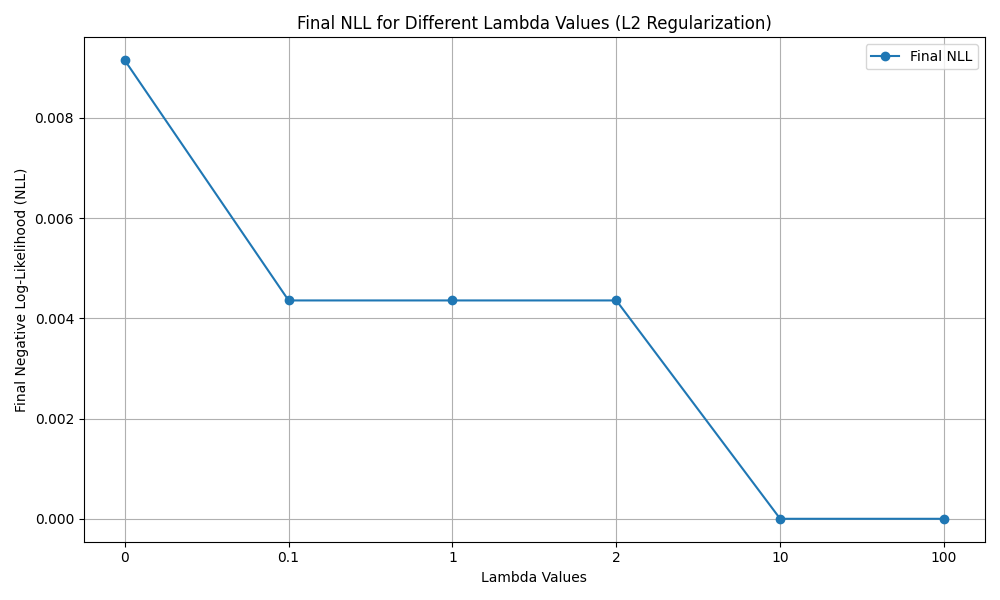

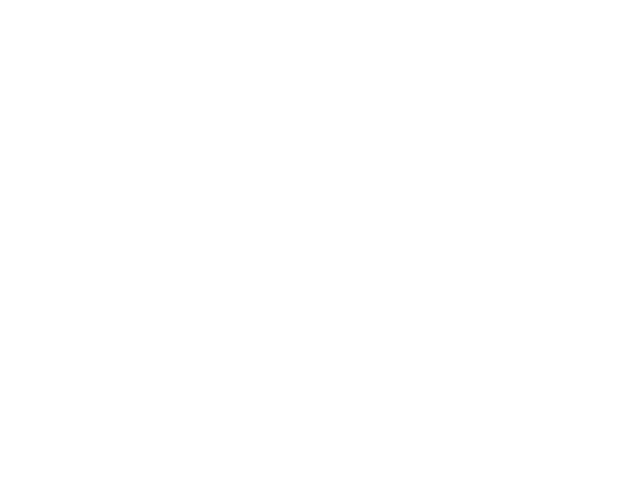

In [122]:
# Plotting final NLL values for selected lambda values
nextplot()
plt.figure(figsize=(10, 6))

# Extract and plot final NLL values for selected lambda values
lambdas_to_plot = ['0', '0.1', '1', '2', '10', '100']
final_nll_values = [results[lam]['final_objective'] for lam in lambdas_to_plot]

plt.plot(lambdas_to_plot, final_nll_values, marker='o', linestyle='-', label="Final NLL")

# Add labels and title
plt.xlabel("Lambda Values")
plt.ylabel("Final Negative Log-Likelihood (NLL)")
plt.title("Final NLL for Different Lambda Values (L2 Regularization)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


X-axis (Lambda Values): Represents different values of the L2 regularization parameter (λ). Smaller values (close to 0) correspond to minimal regularization, while larger values apply stronger regularization.

Y-axis (Final NLL): Shows the final negative log-likelihood (NLL) value after training for each λ. The NLL measures the model's fit: lower values generally indicate a better fit to the data.

Trend Analysis:

- High NLL at λ=0: When λ=0, there's no regularization, and we see a relatively higher NLL. This could suggest overfitting due to lack of regularization, as the model is more flexible.
- Decreasing NLL for Small λ Values (0.01 to 0.1): As λ increases slightly, the NLL decreases, indicating that adding a bit of regularization helps the model fit better by preventing overfitting.
- Stabilization of NLL (from λ=1 to λ=10): The NLL remains stable across these values, suggesting that this range of regularization balances model fit and generalization well.
- Lowest NLL at Higher λ Values (λ=10 and λ=100): For larger values of λ, the NLL reaches a minimum and then flattens. This indicates that the model has found an optimal regularization strength, beyond which additional regularization does not significantly improve or degrade performance.

Summary
- Best λ Range: λ values between 2 and 10 seem to offer a balance between fit and regularization.
- Effect of Regularization: Regularization helps reduce NLL initially, but beyond a certain point, increasing λ has little additional effect.


## 4c Composition of Weight Vector

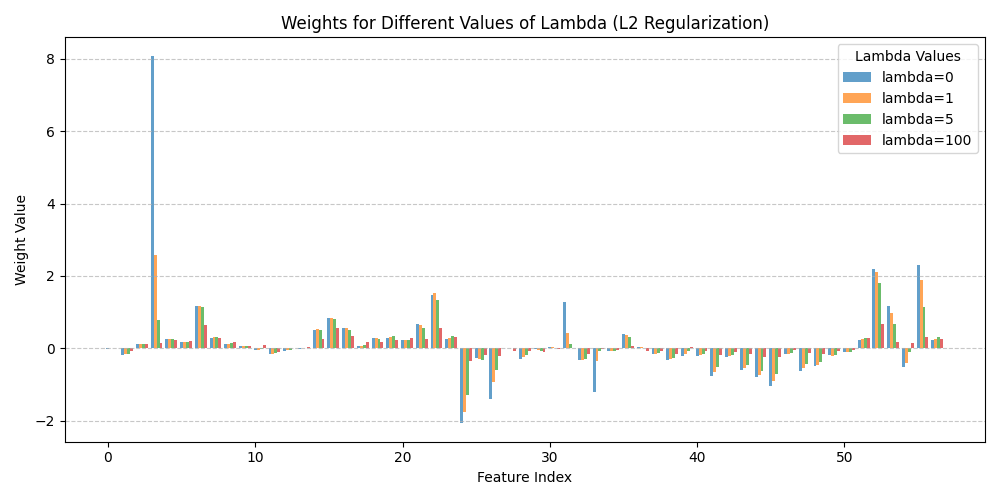

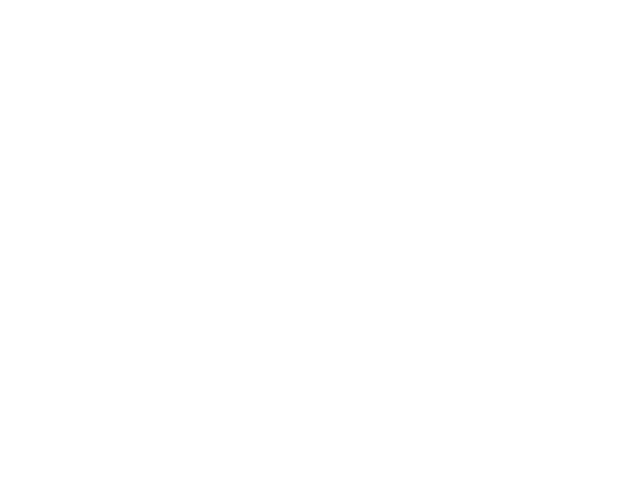

In [123]:
# YOUR CODE HERE
nextplot()
plt.figure(figsize=(10, 5))

# Plot bars with different offsets to avoid overlap
bar_width = 0.2  # Width of each bar

plt.bar(np.arange(D), results['0']['final_weights'], width=bar_width, label='lambda=0', alpha=0.7)
plt.bar(np.arange(D) + bar_width, results['1']['final_weights'], width=bar_width, label='lambda=1', alpha=0.7)
plt.bar(np.arange(D) + 2 * bar_width, results['5']['final_weights'], width=bar_width, label='lambda=5', alpha=0.7)
plt.bar(np.arange(D) + 3 * bar_width, results['100']['final_weights'], width=bar_width, label='lambda=100', alpha=0.7)

# Add labels and title
plt.xlabel("Feature Index")
plt.ylabel("Weight Value")
plt.title("Weights for Different Values of Lambda (L2 Regularization)")
plt.legend(title="Lambda Values")
plt.grid(axis="y", linestyle="--", alpha=0.7)  # Add grid for easier comparison
plt.tight_layout()
plt.show()


## 5 Exploration (optional)

### 5 Exploration: PyTorch

In [125]:
!pip install torch

  Using cached filelock-3.16.1-py3-none-any.whl.metadata (2.9 kB)
  Using cached mpmath-1.3.0-py3-none-any.whl.metadata (8.6 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.3/64.3 MB 7.7 MB/s eta 0:00:00m eta 0:00:010:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.2/6.2 MB 8.0 MB/s eta 0:00:008.4 MB/s eta 0:00:01
Using cached filelock-3.16.1-py3-none-any.whl (16 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 7.1 MB/s eta 0:00:008.5 MB/s eta 0:00:01
Using cached mpmath-1.3.0-py3-none-any.whl (536 kB)


In [126]:
# if you want to experiment, here is an implementation of logistic
# regression in PyTorch
import math
import torch
import torch.nn as nn
import torch.utils.data
import torch.nn.functional as F

# prepare the data
Xztorch = torch.FloatTensor(Xz)
ytorch = torch.LongTensor(y)
train = torch.utils.data.TensorDataset(Xztorch, ytorch)


# manual implementation of logistic regression (without bias)
class LogisticRegression(nn.Module):
    def __init__(self, D, C):
        super(LogisticRegression, self).__init__()
        self.weights = torch.nn.Parameter(
            torch.randn(D, C) / math.sqrt(D)
        )  # xavier initialization
        self.register_parameter("W", self.weights)

    def forward(self, x):
        out = torch.matmul(x, self.weights)
        out = F.log_softmax(out)
        return out


# define the objective and update function. here we ignore the learning rates
# and parameters given to us by optimize (they are stored in the PyTorch model
# and optimizer, resp., instead)
def opt_pytorch():
    model = LogisticRegression(D, 2)
    criterion = nn.NLLLoss(reduction="sum")
    # change the next line to try different optimizers
    # optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
    optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

    def objective(_):
        outputs = model(Xztorch)
        return criterion(outputs, ytorch)

    def update(_1, _2):
        for i, (examples, labels) in enumerate(train_loader):
            outputs = model(examples)
            loss = criterion(outputs, labels)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

        W = model.state_dict()["W"]
        w = W[:, 1] - W[:, 0]
        return w

    return (objective, update)

In [127]:
# run the optimizer
learning_rate = 0.01
batch_size = 100  # number of data points to sample for gradient estimate
shuffle = True  # sample with replacement (false) or without replacement (true)

train_loader = torch.utils.data.DataLoader(train, batch_size, shuffle=True)
wz_t, vz_t, _ = optimize(opt_pytorch(), None, nepochs=100, eps0=None, verbose=True)

/var/folders/mm/5jv3lmt93yd4f1nkxw3yxcv80000gp/T/ipykernel_76949/2194961090.py:26: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  out = F.log_softmax(out)


Epoch   0: f=  3318.488, eps=       nan
Epoch   1: f=   895.638, eps=       nan
Epoch   2: f=   795.096, eps=       nan
Epoch   3: f=   753.648, eps=       nan
Epoch   4: f=   730.969, eps=       nan
Epoch   5: f=   717.160, eps=       nan
Epoch   6: f=   707.443, eps=       nan
Epoch   7: f=   700.422, eps=       nan
Epoch   8: f=   693.743, eps=       nan
Epoch   9: f=   689.522, eps=       nan
Epoch  10: f=   685.204, eps=       nan
Epoch  11: f=   683.015, eps=       nan
Epoch  12: f=   679.867, eps=       nan
Epoch  13: f=   677.748, eps=       nan
Epoch  14: f=   675.596, eps=       nan
Epoch  15: f=   673.622, eps=       nan
Epoch  16: f=   672.390, eps=       nan
Epoch  17: f=   671.633, eps=       nan
Epoch  18: f=   669.815, eps=       nan
Epoch  19: f=   669.259, eps=       nan
Epoch  20: f=   668.208, eps=       nan
Epoch  21: f=   667.692, eps=       nan
Epoch  22: f=   665.956, eps=       nan
Epoch  23: f=   665.391, eps=       nan
Epoch  24: f=   664.612, eps=       nan
